# Exploring my Yu-Gi-Oh! Collection

### EDA

EDA to explore my card collection and find interesting facts/statistics about my collection

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
import glob
import itertools
from itertools import islice
from collections import OrderedDict
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import ipywidgets as widgets

My database contains information about each card that I have in my collection, such as "Name", "Attribute", "Type" and more...

Let's explore all the columns below

In [2]:
#load data

ygo = pd.read_excel(".\data\Ygo!.xlsx", sheet_name=['Binders', 'Misc - Structure Decks', 'Misc', 'Commons-Rares Binder'])
sell_ygo = pd.read_excel(".\data\Sell_Ygo!.xlsx", sheet_name=['For Sale-Trade'])

#assign each sheet to a unique dataframe
binder_df = ygo["Binders"]
sdecks_df = ygo["Misc - Structure Decks"]
misc_df = ygo["Misc"]
commRares_df = ygo["Commons-Rares Binder"]

sell_df = sell_ygo["For Sale-Trade"]

#main_df_list = ["binder_df", "sdecks_df", "misc_df", "commRares_df"] #list of all df names (Excluding the sell df as i do not want to mix those in with the main collection)
all_main_dfs = pd.concat([binder_df, sdecks_df, misc_df, commRares_df], join = "inner") #new df that is a concatenation of all the rest (Excluding the sell df as i do not want to mix those in with the main collection)

In [21]:
collection_ids = ["Binders", "Structure_Decks", "Misc", "CommonRares_Binder", "Sale_Trade", "All"]
df_dict = dict(zip(collection_ids, [binder_df, sdecks_df, misc_df, commRares_df, sell_df, all_main_dfs]))

In [5]:
#explore the columns of each df
for sheet in ygo:
    print(f"The columns of {sheet} df are: \n {ygo[sheet].columns}, total: {len(ygo[sheet].columns)} \n")
    
for sheet in sell_ygo:
    print(f"The columns of {sheet} df are: \n {sell_ygo[sheet].columns}, total: {len(sell_ygo[sheet].columns)} \n")

The columns of Binders df are: 
 Index(['Name', 'Attribute', 'Type',
       'Card_Type (Normal/Effect/Ritual/Fusion/Synchro/XYZ/Pendulum/Link)',
       'ATK', 'DEF', 'Rarity', 'Count', 'Link', 'Level/Rank', 'Pendulum Scale',
       'Set', 'Comments', 'Tuner/Flip/Gemini/Toon', 'Price £', 'EDITION',
       'Binder', 'Binder2', 'Holo Bulk', 'Common Bulk'],
      dtype='object'), total: 20 

The columns of Misc - Structure Decks df are: 
 Index(['Name', 'Attribute', 'Type', 'Card_Type', 'ATK', 'DEF', 'Rarity',
       'Count', 'Link', 'Level/Rank', 'Pendulum Scale', 'Set', 'Comments',
       'Tuner/Flip/Gemini', 'Price £', 'EDITION'],
      dtype='object'), total: 16 

The columns of Misc df are: 
 Index(['Name', 'Attribute', 'Type', 'Card_Type', 'ATK', 'DEF', 'Rarity',
       'Count', 'Link', 'Level/Rank', 'Pendulum Scale', 'Set', 'Comments',
       'Tuner/Flip/Gemini/Spirit', 'Price £', 'EDITION', 'Binders',
       'Unnamed: 17'],
      dtype='object'), total: 18 

The columns of Commons-

In [6]:
print(binder_df.describe())

            Count       Link  Level/Rank  Pendulum Scale    Price £  \
count  781.000000  39.000000  578.000000       15.000000  28.000000   
mean     1.012804   3.051282    6.987889        4.333333   1.469286   
std      0.142649   1.122702    2.594794        3.792223   4.945844   
min      1.000000   1.000000    0.000000        0.000000   0.050000   
25%      1.000000   2.000000    5.000000        1.000000   0.177500   
50%      1.000000   3.000000    7.000000        4.000000   0.360000   
75%      1.000000   4.000000    8.000000        7.500000   0.705000   
max      3.000000   6.000000   13.000000       12.000000  26.500000   

       Holo Bulk  Common Bulk  
count  15.000000          0.0  
mean    1.533333          NaN  
std     0.743223          NaN  
min     1.000000          NaN  
25%     1.000000          NaN  
50%     1.000000          NaN  
75%     2.000000          NaN  
max     3.000000          NaN  


In [7]:
def df_desc(df = "all_main_dfs"):
    
    if df == "all_main_dfs":
        print(all_main_dfs.describe())
    if df == "binder_df":
        print(binder_df.describe())
    if df == "sdecks_df":
        print(sdecks_df.describe())
    if df == "misc_df":
        print(misc_df.describe())
    if df == "commRares_df":
        print(commRares_df.describe())
    if df == "sell_df":
        print(sell_df.describe())

In [8]:
radio_buttons = widgets.RadioButtons(
    options = ["binder_df", "sdecks_df", "misc_df", "commRares_df", "sell_df", "all_main_dfs"],
    value = "all_main_dfs"
)

In [9]:
widgets.interact(df_desc, df = radio_buttons)
#widgets.interact(df_desc, df = [binder_df, sdecks_df, misc_df, commRares_df, sell_df, all_main_dfs])

interactive(children=(RadioButtons(description='df', index=5, options=('binder_df', 'sdecks_df', 'misc_df', 'c…

<function __main__.df_desc(df='all_main_dfs')>

In [10]:
cols = ["Name","Rarity","Set","EDITION"] #for now we will focus on these 4 columns

binder_df = ygo["Binders"].loc[:, cols]
sdecks_df = ygo["Misc - Structure Decks"].loc[:, cols]
misc_df = ygo["Misc"].loc[:, cols]
commRares_df = ygo["Commons-Rares Binder"].loc[:, cols]

sell_df = sell_ygo["For Sale-Trade"].loc[:, cols]

In [11]:
#Explore size of each df

print("The size of the binder df is:", binder_df.shape)
print("The size of the structure decks df is:", sdecks_df.shape)
print("The size of the misc df is:", misc_df.shape)
print("The size of the commRares df is:", commRares_df.shape)

print("The size of the sell df is:", sell_df.shape)

The size of the binder df is: (921, 4)
The size of the structure decks df is: (19, 4)
The size of the misc df is: (324, 4)
The size of the commRares df is: (47, 4)
The size of the sell df is: (222, 4)


In [22]:
for key in df_dict.keys():
    print(f"Out of {len(df_dict[key])} rows, the {key} df has this many empty fields:\n", df_dict[key].isnull().sum(), "\n")

Out of 921 rows, the Binders df has this many empty fields:
 Name        0
Rarity      0
Set        23
EDITION    83
dtype: int64 

Out of 19 rows, the Structure_Decks df has this many empty fields:
 Name        0
Rarity      0
Set         0
EDITION    10
dtype: int64 

Out of 324 rows, the Misc df has this many empty fields:
 Name        0
Rarity      0
Set         0
EDITION    37
dtype: int64 

Out of 47 rows, the CommonRares_Binder df has this many empty fields:
 Name        0
Rarity      0
Set         0
EDITION    30
dtype: int64 

Out of 222 rows, the Sale_Trade df has this many empty fields:
 Name        0
Rarity      0
Set         0
EDITION    40
dtype: int64 

Out of 1311 rows, the All df has this many empty fields:
 Name                 0
Attribute          261
Type               290
ATK                466
DEF                524
Rarity               0
Count              271
Link              1253
Level/Rank         535
Pendulum Scale    1290
Set                 23
Comments    

The above information makes sense, as "Name" is essential in order to recognise the card, and "Rarity" is important in knowing the how "rare" the card is (Super Rare, Ultra Rare, Secret Rare, etc...). Set (a code that indicates the set of origin of the card) and EDITION are also important in order to identify the version of the card that i own i.e, from which set did it come, and was it from the first printing of that set or a reprinted version. These information are important if we want to determine the version and/or value of the card. A card may be printed in multiple sets, and a set is considered 1st edition the first time it is printed, but may be reprinted at a future time as an "Unlimited edition". This unlimited edition prints tend to be of lower value. 

## Visualisations/Graphs

Let's explore more with the help of some graphs/visualisations techniques

### "Set" attribute

In [25]:
#Create a dictionary of each set code in our database and how many times it appears

print("Number of set entries:",len(df_dict["All"]["Set"]))
print("Number of unique set entries:",df_dict["All"]["Set"].nunique())

set_dict = df_dict["All"]["Set"].value_counts()

set_dict = set_dict.to_dict()
print(set_dict)
#print(len(set_dict))

Number of set entries: 1311
Number of unique set entries: 186
{'RA03': 123, 'RA02': 61, 'MP22': 59, 'BLMR': 56, 'MP24': 45, 'MP23': 40, 'RA01': 38, 'MP21': 37, 'HAC1': 36, 'GFP2': 35, 'BLCR': 35, 'BLC1': 31, 'LEDE': 31, 'DUPO': 21, 'YGLD': 21, 'ROTA': 19, 'BLTR': 17, 'LDK2': 15, 'LEDD': 15, 'LDS3': 15, 'MAZE': 13, 'KICO': 12, 'INFO': 12, 'SDCS': 11, 'DRL3': 11, 'MAMA': 11, 'LCGX': 10, 'MP16': 10, 'DUDE': 9, 'SDCB': 9, 'LED7': 9, 'SDFC': 9, 'PHHY': 8, 'SDSA': 8, 'WSUP': 8, 'MP15': 8, 'LC01 (25th anniversary)': 8, 'SR14': 8, 'EG01': 8, 'SHVI': 8, 'BLVO': 7, 'LODT': 7, 'LDS2': 7, 'LC02': 7, 'BOSH': 7, 'TDIL': 6, 'LOB (25th anniversary)': 6, 'DUNE': 6, 'DUOV': 6, 'SDAZ': 6, 'MZMI': 6, 'SDCK': 6, 'TN23': 6, 'LC01': 6, 'BROL': 6, 'GFTP': 5, 'CYAC': 5, 'PHNI': 5, 'IOC (25th anniversary)': 5, 'CT13': 5, 'BLLR': 5, 'PEVO': 5, 'SDPL': 5, 'LOB (25th anniversary) ': 5, 'HA07': 5, 'LART': 4, 'DABL': 4, 'BACH': 4, 'LD10': 4, 'BODE': 4, 'CT07': 4, 'EP1': 4, 'DPRP': 4, 'YS15': 3, 'DESO': 3, 'ANPR': 3,

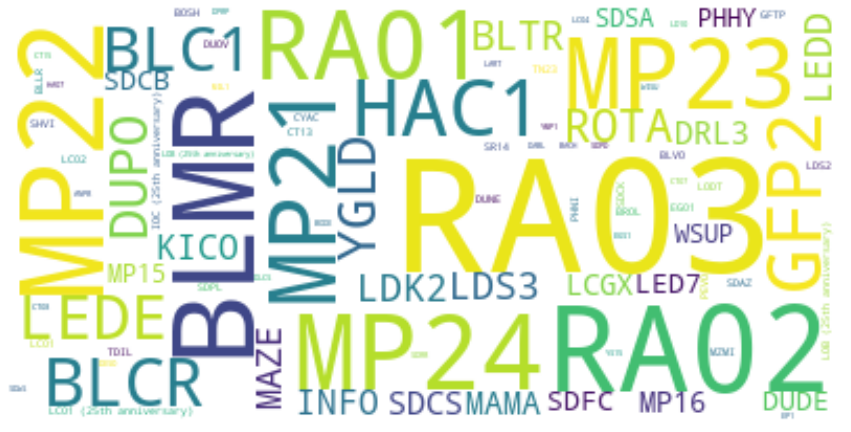

In [26]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000,
               contour_width=2, contour_color='firebrick')

# Generate a wordcloud
wc.generate_from_frequencies(set_dict)

#show
plt.figure(figsize=[15,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
top_sets = dict(itertools.islice(set_dict.items(), 10))
low_sets = OrderedDict(reversed(list(set_dict.items())))
low_sets = dict(itertools.islice(low_sets.items(), 163))

#print(top_sets)
#print(low_sets)

top_bot_sets = {"Top 10 sets": sum(top_sets.values()), "Others": sum(low_sets.values())}

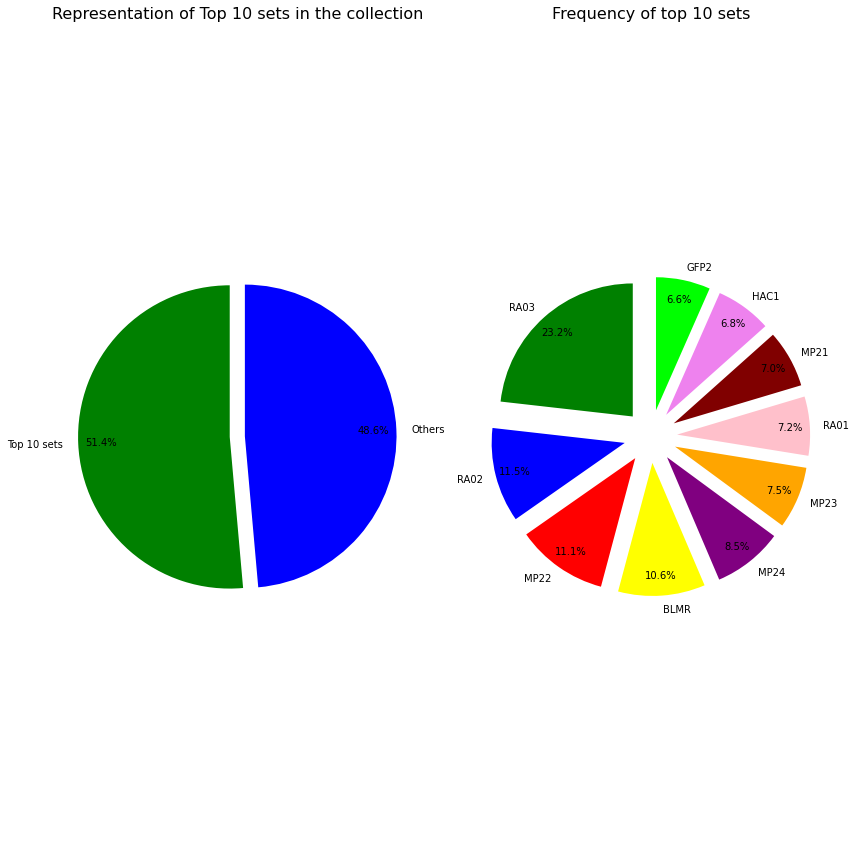

In [29]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors = ["Green", "Blue", "Red", "Yellow", "Purple", "Orange", "Pink", "Maroon", "Violet", "Lime"]
#explosion
explode1 = [0.05] * len(top_bot_sets)
explode2 = [0.2] * len(top_sets)
 
fig1, ax1 = plt.subplots(1,2, figsize = (12,12))

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1[0].pie(list(top_bot_sets.values()), colors = colors, labels=list(top_bot_sets.keys()), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode1)
ax1[0].axis('equal')
ax1[0].set_title("Representation of Top 10 sets in the collection",fontsize=16)

ax1[1].pie(list(top_sets.values()), colors = colors, labels=list(top_sets.keys()), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode2)
ax1[1].axis('equal')
ax1[1].set_title("Frequency of top 10 sets",fontsize=16)
plt.tight_layout()
plt.show()


In [30]:
def split(d: dict[str, int], chunks: int) -> list[dict[str, int]]:
    chunk_len = len(d) // (chunks)
    chunks_list = []
    for i in range(chunks):
        c = chunk_len * i
        chunks_list.append(dict())
        for k, v in islice(d.items(), c, c+chunk_len):
            chunks_list[i].update({k: v})
    return chunks_list

In [31]:
dict_lists = split(set_dict, 4)
#print(dict_lists)
print(len(dict_lists[0]))

46


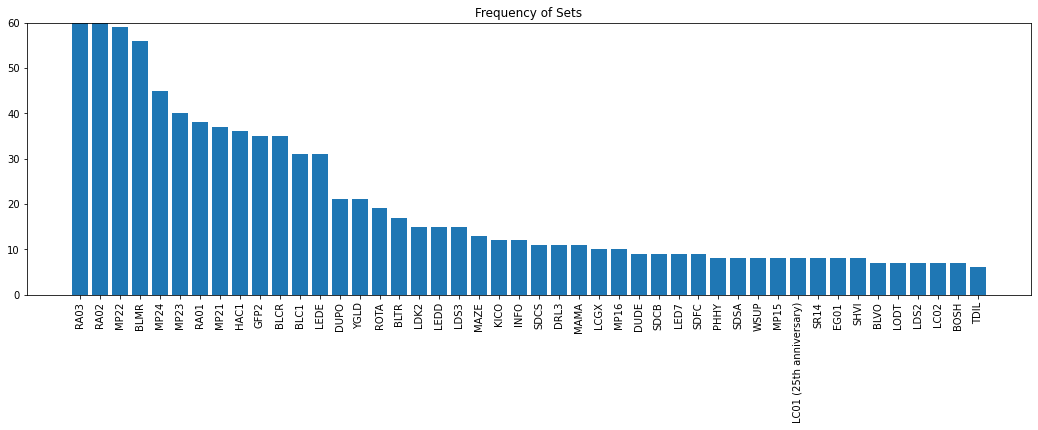

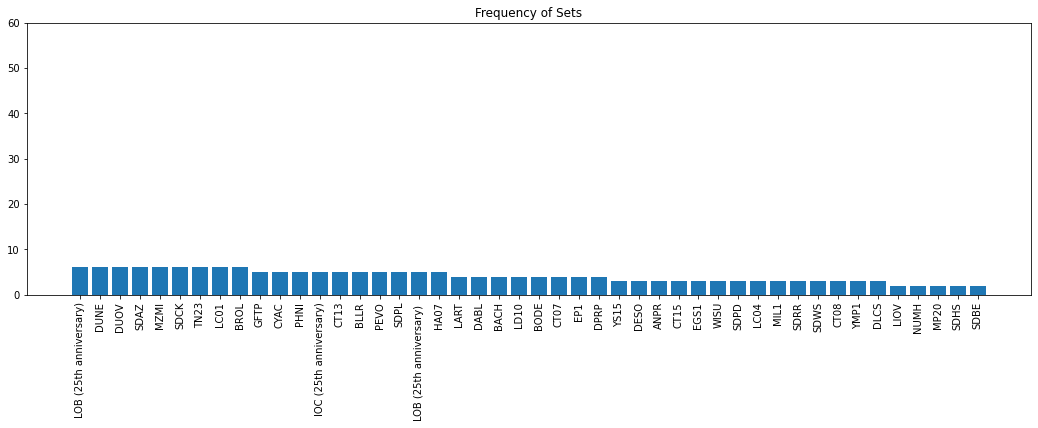

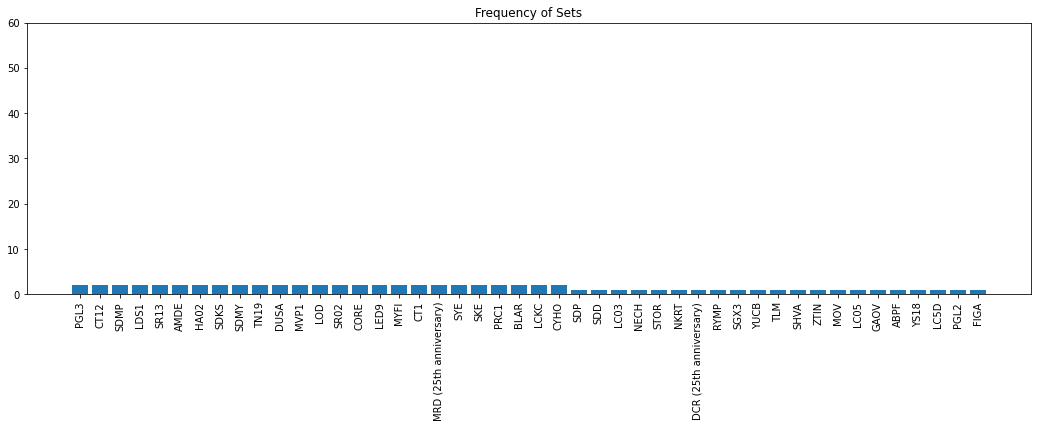

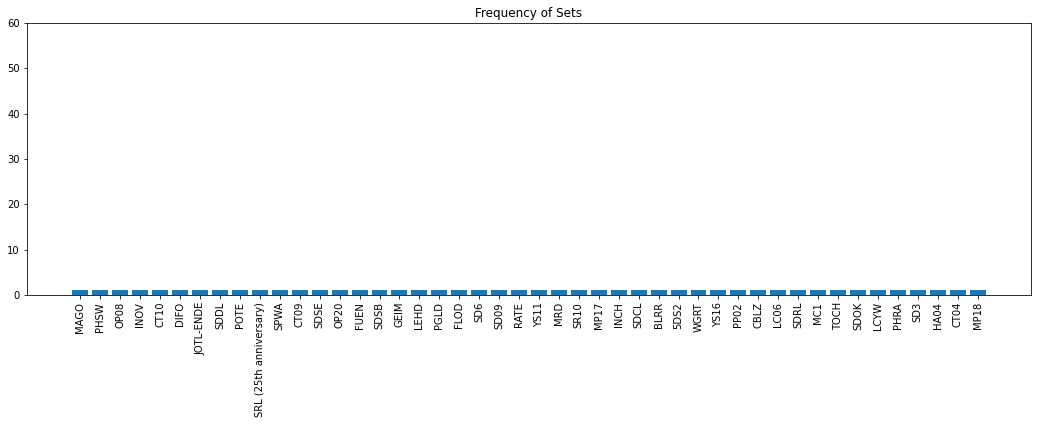

In [38]:
for i in range(len(dict_lists)):
    names = list(dict_lists[i].keys())
    values = list(dict_lists[i].values())

    f, ax = plt.subplots(figsize=(18,5))
    plt.bar(range(len(dict_lists[i])),values,tick_label=names, label = dict_lists[i].keys())
    plt.xticks(rotation=90)
    ax.set_ylim([0, 60])
    ax.set_title("Frequency of Sets")
    plt.show()

### "Edition" attribute

In [45]:
#Lets see the difference between card "EDITIONS"
for key in df_dict.keys():
    print(f"The options for EDITION in {key} df are:", df_dict[key]["EDITION"].unique()) #see all options available for the "EDITION" attribute

The options for EDITION in Binders df are: ['1ST EDITION' 'UNLIMITED EDITION' 'LIMITED EDITION' nan '1st Edition'
 'UNLIMITED' '1st EDITION' 'UNPLAYABLE']
The options for EDITION in Structure_Decks df are: [nan '1st Edition']
The options for EDITION in Misc df are: [nan '1st Edition' 'LIMITED EDITION' 'Unlimited Edition']
The options for EDITION in CommonRares_Binder df are: [nan '1st Edition']
The options for EDITION in Sale_Trade df are: [nan '1st Edition' '1ST EDITION' 'LIMITED EDITION' 'Unlimited Edition']
The options for EDITION in All df are: ['1ST EDITION' 'UNLIMITED EDITION' 'LIMITED EDITION' nan '1st Edition'
 'UNLIMITED' '1st EDITION' 'UNPLAYABLE' 'Unlimited Edition']


In [53]:
Total_cards = [len(df_dict[key]) for key in df_dict.keys()]
print(f"Total_cards for each df is {Total_cards}")

FirstEd_cards = [len(df_dict[key][(df_dict[key]["EDITION"] == '1ST EDITION') | (df_dict[key]["EDITION"] == '1st Edition') | (df_dict[key]["EDITION"] == '1st EDITION')]) for key in df_dict.keys()]
print(f"First Edition cards in each df is {FirstEd_cards}")

UnlimitedEd_cards = [len(df_dict[key][(df_dict[key]["EDITION"] == 'UNLIMITED') | (df_dict[key]["EDITION"] == 'UNLIMITED EDITION') | (df_dict[key]["EDITION"] == 'Unlimited Edition')]) for key in df_dict.keys()]
print(f"Unlimited Edition cards in each df is {UnlimitedEd_cards}")

LimitedEd_cards = [len(df_dict[key][(df_dict[key]["EDITION"] == 'LIMITED') | (df_dict[key]["EDITION"] == 'LIMITED EDITION') | (df_dict[key]["EDITION"] == 'Limited Edition')]) for key in df_dict.keys()]
print(f"Limited Edition cards in each df is {LimitedEd_cards}")

Total_cards for each df is [921, 19, 324, 47, 222, 1311]
First Edition cards in each df is [663, 9, 270, 17, 173, 959]
Unlimited Edition cards in each df is [74, 0, 10, 0, 2, 84]
Limited Edition cards in each df is [100, 0, 7, 0, 7, 107]


In [60]:
myLabels = ["Binders", "Misc - Structure Decks", "Misc", "Commons-Rares Binders", "Sell_Trade", "All"]
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
title_size = 20
label_size = 18

In [61]:
# def my_fmt(p):
#     print(p)
#     total = len(p)
#     return lambda p: '{:.1f}%\n({:.0f})'.format(p, p/) if p > 0 else ''

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct == 0:
            return ''
        else:
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

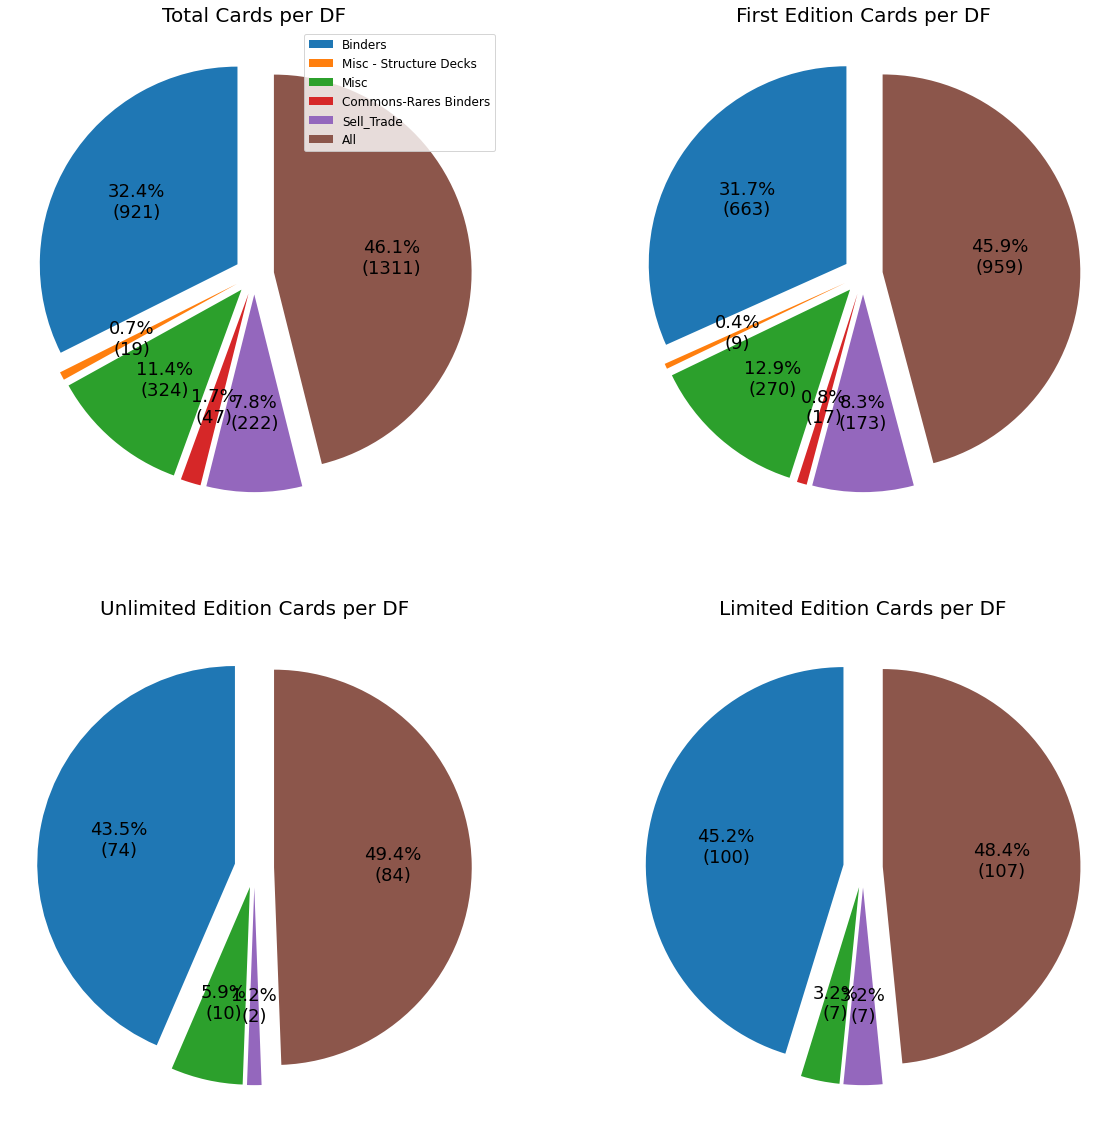

In [64]:
f, ax = plt.subplots(2, 2, figsize = (20,20))

ax[0,0].pie(Total_cards, autopct= autopct_format(Total_cards),
                    startangle=90, explode = explode, textprops={'fontsize': label_size})
ax[0,0].set_title("Total Cards per DF", fontsize = title_size)
ax[0,0].axis("off")

ax[0,1].pie(FirstEd_cards,  autopct = autopct_format(FirstEd_cards),
                    startangle=90, explode = explode,textprops={'fontsize': label_size})
ax[0,1].set_title("First Edition Cards per DF", fontsize = title_size)
ax[0,1].axis("off")

ax[1,0].pie(UnlimitedEd_cards, autopct = autopct_format(UnlimitedEd_cards),
                    startangle=90, explode = explode,textprops={'fontsize': label_size})
ax[1,0].set_title("Unlimited Edition Cards per DF", fontsize = title_size)
ax[1,0].axis("off")

ax[1,1].pie(LimitedEd_cards,autopct= autopct_format(LimitedEd_cards),
                    startangle=90, explode = explode,textprops={'fontsize': label_size})
ax[1,1].set_title("Limited Edition Cards per DF", fontsize = title_size)
ax[1,1].axis("off")

ax[0,0].legend(labels = myLabels,loc="upper right", fontsize = 12)

plt.show()

### END OF EDA
<B>--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</B>